# Training objectives
Proficient in using OpenCV library for basic image operations<br>
Proficient in using OpenCV library for image geometric transformation<br>
Proficient in using OpenCV library for image smoothing operations<br>
Proficient in using OpenCV library for image morphological processing<br>
Proficient in using OpenCV library for image edge detection


## Training demonstration

In [1]:
!unrar x -inul -y DataSetReadOnly/opencvDATA.rar ./
%matplotlib inline
%run ./opencvDATA/model.py

<Figure size 432x288 with 0 Axes>

# Steps

## 1- Image basic operation

### 1.1 Reading an image
<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Use <strong>cv.imread()</strong> function to read the image. The image should be in the working directory or the full path to the image should be given.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The second parameter is a flag that specifies how the image should be read.。<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;cv.IMREAD_COLOR： Load the color image. The transparency of any image will be ignored. It is the default flag.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;cv.IMREAD_GRAYSCALE：Load image in grayscale mode<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;cv.IMREAD_UNCHANGED：Loads images, including the alpha channel<br>
<strong>Note that in addition to these three flags, you can simply pass the integers 1, 0, or -1, respectively.</strong><br>

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#Load the color grayscale image
img = cv.imread('./opencvData/gd.jpg',0)

### 1.2 Show image dimensions
<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The image size is the pixel size of the image, which is composed of two dimensions, width and height. In ordinary times, the 1920x1080 size picture means that the image is 1920 pixels wide and 1080 pixels high. The size of the image loaded above is 435x580.
<br>

In [3]:
img.shape

(435, 580)

### 1.3 Display grayscale map
<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Gray Scale Image or Grey Scale Image, also known as gray scale image. The logarithmic relationship between white and black is divided into several levels, called gray. Grayscale is divided into 256 levels, that is, each pixel in the image is a number between 0 and 255.
</font>

<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Use function <strong>cv.imshow()</strong>to display the image in the window. The window automatically fits the image size.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The first argument is the window name, which is a string.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The second argument is our object. You can create as many Windows as you want, but you can use different window names.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<strong>Note that in the jupyter environment, opencv's cv.imshow() function does not display images properly, so we use plt.imshow() replace cv.imshow()</strong><br>
</font>

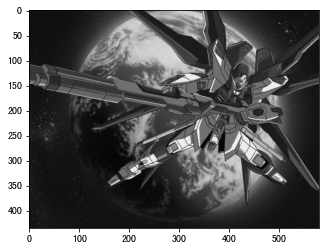

In [4]:
plt.imshow(img,plt.cm.gray)
plt.show()

### 1.4 Write the image
<font color=gray size=3>Use function <strong>cv.imwrite()</strong> to save the image。<br>
The first argument is the file name, and the second argument is the image to save.<br> cv.imwrite('gd.png'，img)
This will save the image in PNG format in your working directory.</font>

In [7]:
cv.imwrite('gd.png',img)

True

## 2-Image geometry transformation

<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Geometric transformation includes image translation, rotation, affine transformation and so on.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Here's the content: <strong>cv.getPerspectiveTransform</strong>and so on<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;OpenCV provides two conversion functions<strong>cv.warpAffine</strong> and <strong>cv.warpPerspective</strong>，You can use them for various transformations. <strong>cv.warpAffine</strong> adopt 2x3 transformation matrix，but<strong>cv.warpPerspective</strong> adopt 2x3 transformation matrix as input.
</font>

### 2.1 Zoom
<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Zooming simply resizes the image. For this purpose, OpenCV comes with a function<strong>cv.resize()</strong>. The size of the image can be specified manually, or the zoom can be specified. Different interpolation methods can also be used. The preferred interpolation method is <strong>cv.INTER_AREA</strong> used to zoom out, <strong>cv.INTER_CUBIC</strong> <strong>and cv.INTER_LINEAR</strong>used to zoom in. By default, for all resizing purposes, the interpolation used is <strong>cv.INTER_LINEAR</strong>.
</font>

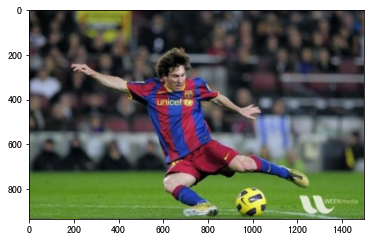

In [8]:
from matplotlib import pyplot as plt
img = cv.imread('./opencvData/messi.jpg')
#Changing the image size
res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC) 
height, width = img.shape[:2]
res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)
#Transform image channel BGR->RGB
res = cv.cvtColor(res, cv.COLOR_BGR2RGB)
plt.imshow(res)
plt.show()

### 2.2 translation
<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A translation is a shift in the position of an object. If you know the displacement in the (x,y) direction, set it to (t_x,t_y), and you can create the transformation
The matrix M is shown as follows:<br>
<br>
$$M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix} $$
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We can put it in <strong>np.float32</strong> type Numpy in the array and pass it to <strong>cv.warpAffine</strong> function. See the following example with an offset of (100, 50)：
<font>

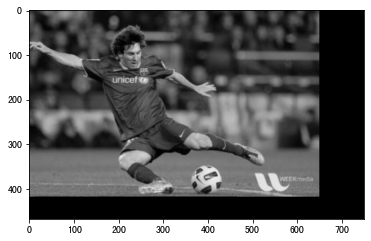

In [10]:
img = cv.imread('./opencvData/messi.jpg',0)
#Get the width and height of the image
rows,cols = img.shape
#Define the translation transformation parameters
M = np.float32([[1,0,-100],[0,1,-50]])
#Image translation
dst = cv.warpAffine(img,M,(cols,rows))
res = cv.cvtColor(dst, cv.COLOR_BGR2RGB)
plt.imshow(res)
plt.show()

### 2.3 rotating
<br>
<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The rotation Angle of the image is θ through the transformation matrix of the following form:<br>
<br>
$$M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}$$
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;But OpenCV provides scalable rotations and an adjustable center of rotation, so you can rotate anywhere you like. The modified transformation matrix is
<br>
<br>
$$\begin{bmatrix} \alpha & \beta & (1- \alpha ) \cdot center.x - \beta \cdot center.y \\ - \beta &\alpha & \beta \cdot center.x + (1- \alpha ) \cdot center.y \end{bmatrix}$$<br>
Among them：<br><br>
$$\begin{array}{l} \alpha = scale \cdot \cos \theta , \\ \beta = scale \cdot \sin \theta \end{array}$$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To find this transformation matrix, OpenCV provides a function <strong>cv.getRotationMatrix2D</strong>.
<font>

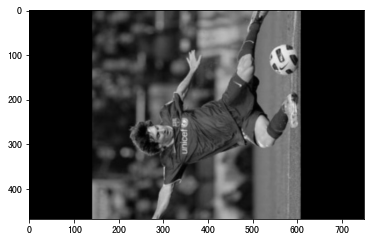

In [11]:
img = cv.imread('./opencvDATA/messi.jpg',0)
rows,cols = img.shape
#Define the rotation transformation parameters
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))
res = cv.cvtColor(dst, cv.COLOR_BGR2RGB)
plt.imshow(res)
plt.show()

### 2.4 Affine transformation
<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In an affine transform, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points in the input image and their corresponding positions in the output image. Then <strong>cv.getAffineTransform</strong> will create a 2x3 matrix，this matrix will transfer to <strong>cv.warpAffine</strong>.
</font>

(<AxesSubplot:title={'center':'Output'}>,
 Text(0.5, 1.0, 'Output'))

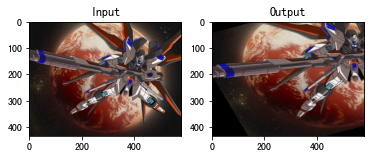

In [12]:
img = cv.imread('./opencvDATA/gd.jpg')
rows,cols,ch = img.shape
#Define affine transformation parameters
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')

### 2.5 Transformation of perspective
<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For perspective, we need a 3x3 transformation matrix. Even after the conversion, the line will remain straight. To find this transformation matrix, you need four points on the input image and corresponding points on the output image. Of the four points, three should not be collinear. And then you can go through the function <strong>cv.getPerspectiveTransform</strong> find the transformation matrix. then <strong>cv.warpPerspective</strong> apply to this 3x3 transformation matrix.
</font>

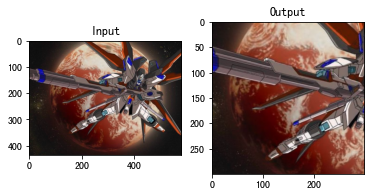

In [13]:
img = cv.imread('./opencvDATA/gd.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## 3-Smoothing of image
<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Image smoothing means that under the influence of hardware, environment and other factors, there will be some areas with excessive brightness changes in the image, or some bright spots (also known as noise). In order to suppress the noise, the image brightness tends to be smooth processing method is image smoothing. Image smoothing is actually low-pass filtering, and the smoothing process will lead to image edge blurring.<br>

<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Using a variety of low pass core blur images, a customized filter core mirror is applied to the image.
<br>

### 3.1 2D convolution (image filtering)
<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As with one-dimensional signal, various low-pass filters (LPF), high-pass filters (HPF) can be used to filter the image. LPF helps eliminate noise, blur images, etc. The HPF filter helps to find edges in the image.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;OpenCV provides a function<strong>cv.filter2D</strong> to convolve the kernel with the image. For example, we will try to average filter the image. The 5x5 average filter kernel is shown as follows:<br><br>
$$K = \frac{1}{25}\begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 &
1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \end{bmatrix}$$ <br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The operation is as follows: Keep the kernel at one pixel, add all 25 pixels below the kernel, take the average, and replace the center pixel with the new average. It will continue this operation for all pixels in the image. Try this code and check the results:
<br>

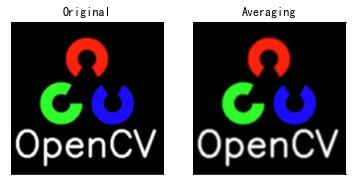

In [14]:
img = cv.imread('./opencvDATA/opencv.jpg')
# Define convolution kernel
kernel = np.ones((5,5),np.float32)/25
# Operation of convolution
dst = cv.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Image blurring is realized by convolving the image with the low-pass filter kernel. This is useful for noise cancellation. It's actually from the graph eliminate high frequency parts (e.g. noise, edges) in image. Therefore, the edges are somewhat blurred in this operation. (There are some blurring techniques that do not blur the edges, either). OpenCV offers four main types of blurring technology.
<font>
<br>

### 3.2 Average
<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This is done by convolving the image with a normalized box filter. It simply takes the average of all pixels in the kernel area and replaces the central element. This is by function <strong>cv.blur() or cv.boxFilter()</strong> to be done. Check the documentation for more details about the kernel. We should specify the width and height of the kernel. The 3x3 normalized box filter is shown as follows: <br><br>
$$K = \frac{1}{9} \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$$
Take a look at the following example demonstration with a kernel size of 5x5:
<font>
<br>

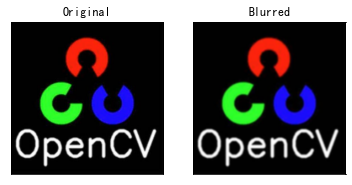

In [15]:
img = cv.imread('./opencvDATA/opencv.jpg')
#Fuzzy operation
blur = cv.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### 3.3 Gaussian blur
<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The Gaussian kernel replaces the box filter, which is passed through the function <strong>cv.GaussianBlur()</strong> to finished. We should specify the width and height of the kernel, which should be positive and odd. We should also specify the standard deviations in the X and Y directions as sigmaX and sigmaY, respectively. If only sigmaX is specified, sigmaY will be the same as sigmaX. If both of them are zero. It is calculated based on the kernel size. Gaussian blur is very effective for removing Gaussian noise from images.If necessary, you can create a Gaussian kernel using the function  <strong>cv.getGaussianKernel()</strong> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The above code can be modified to achieve Gaussian blur:
<br>

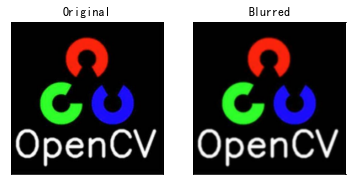

In [16]:
img = cv.imread('./opencvDATA/opencv.jpg')
#Gaussian convolution operation
blur = cv.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### 3.4 Median ambiguity
<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Here, the function <strong>cv.medianBlur()</strong> extracts the median value of all pixels under the kernel area and replaces the central element with that value.
This is very effective for eliminating salt and pepper noise in the image. Interestingly, in the above filter, the central element is the newly calculated value, which can be the pixel value in the image or the new value. But in median blur, the central element is always replaced by some pixel value in the image. Effective noise reduction. Its kernel size should be a positive odd integer.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In this demonstration, I added 50% noise to the original image and applied median blur. Inspection results:
<font>

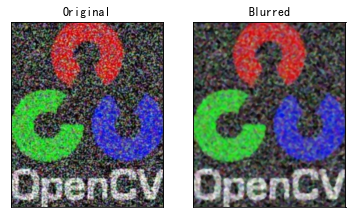

In [17]:
img = cv.imread('./opencvDATA/opencv1.jpg')
median = cv.medianBlur(img,5)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### 3.5 Two sided filtering
<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;cv.bilateralFilter() is very effective at removing noise while keeping the edges sharp and clear. However, this operation is slow compared to other filters. We have seen that the Gaussian filter takes the neighborhood around the pixel and finds its Gaussian weighted average. A Gaussian filter is only a function of space, that is, it takes into account nearby pixels. It doesn't take into account whether the pixels have nearly the same intensity. It doesn't consider whether the pixel is an edge pixel or not. So it also blurs the edges, which we don't want to do.
<font>

<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Bilateral filters also use Gaussian filters in space, but there is another Gaussian filter, which is a function of pixel difference. The Gaussian function of space ensures that only the blur of nearby pixels is taken into account, while the Gaussian function of intensity difference ensures that only the blur of those pixels whose intensity is similar to the center pixel is taken into account. Since the pixel intensity of the edge varies greatly, the edge can be preserved.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The following example shows the use of two-sided filters.
<font>

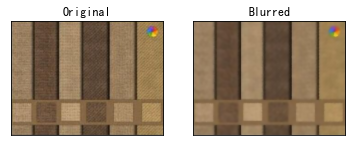

In [18]:
img = cv.imread('./opencvDATA/test.jpg')
img = img[:,:,::-1]
blur = cv.bilateralFilter(img,9,75,75)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## 4-OpenCV morphological processing

Morphometric transformations are simple operations based on the shape of an image. This is usually performed on binary images. It requires two inputs, one is our original image, and the second is the structural element or kernel that determines the operational nature of . <strong>The two basic morphological operators are erosion and expansion. Then, variations of it (such as "on", "off", "gradient", etc.) come into play. We'll look at each of them with the help of the chart below:</strong> 
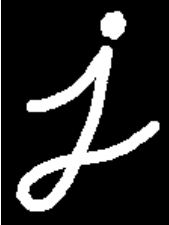

### 4.1 erosion
<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The basic idea of erosion is like soil erosion, which erodes the boundaries of foreground objects (try to keep the foreground white). What does it do? The kernel slides through the image (in 2D convolution). A pixel in the original image (whether 1 or 0) is only considered to be 1 if all the pixels under the kernel are 1, otherwise it will erode (become 0). The result is that, depending on the size of the kernel, any pixels near the boundary are discarded. As a result, the thickness or size of the foreground object decreases, or just the white area in the image decreases. It helps to remove small white noise (as we saw in the Color Space section), separate two connected objects, etc
</font>

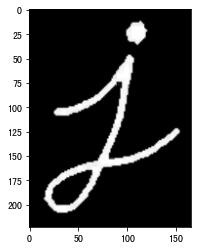

In [19]:
img = cv.imread('./opencvDATA/char1.jpg',0)
kernel = np.ones((5,5),np.uint8)
#erosion
erosion = cv.erode(img,kernel,iterations = 1)
plt.imshow(erosion,plt.cm.gray)
plt.show()

### 4.2 inflation
<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;It's the opposite of erosion. The pixel element is "1" if at least one pixel under the kernel is "1". Therefore, it increases the white area in the image or increases the size of the foreground object. Usually, with noise elimination, corrosion will expand. Because corrosion eliminates white noise, but it also shrinks objects. So we extended it. Since the noise is gone, they don't come back, but our target area has increased. It is also useful when connecting corrupt parts of objects.
<font>

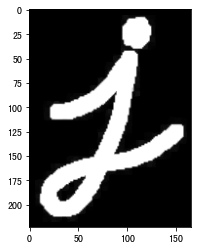

In [20]:
img = cv.imread('./opencvDATA/char1.jpg',0)
#Core of definition
kernel = np.ones((5,5),np.uint8)
#inflation
dilation = cv.dilate(img,kernel,iterations = 1)
plt.imshow(dilation,plt.cm.gray)
plt.show()

### 4.3 Open operation
<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Opening up is just another name for <strong>eroding and then expanding</strong>. As mentioned above, it is useful for noise cancellation. In this case, we use functions <strong>cv.morphologyEx()</strong>
</font>

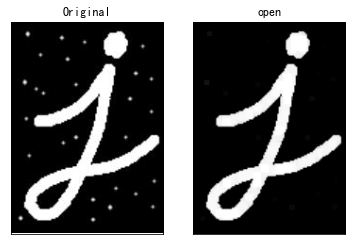

In [21]:
img = cv.imread('./opencvDATA/char2.jpg',0)
#Core of definition
kernel = np.ones((5,5),np.uint8)
#Open operation
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
plt.subplot(121),plt.imshow(img,plt.cm.gray),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(opening,plt.cm.gray),plt.title('open')
plt.xticks([]), plt.yticks([])
plt.show()

### 4.4 Closed operation
<font color=gray size=3>
The closed operation is the opposite of the open operation, where <strong>expands and then erodes</strong>. Useful for closing small holes inside foreground objects or small black dots on objects.
</font>

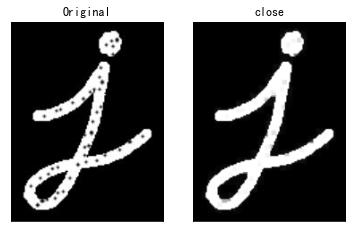

In [22]:
img = cv.imread('./opencvDATA/char3.jpg',0)
kernel = np.ones((5,5),np.uint8)
#Closed operation
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
plt.subplot(121),plt.imshow(img,plt.cm.gray),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(closing,plt.cm.gray),plt.title('close')
plt.xticks([]), plt.yticks([])
plt.show()

### 4.5 Gradient of morphology
<font color=gray size=3>
This is the difference between image bloat and image erosion. The result will look like the outline of the object.

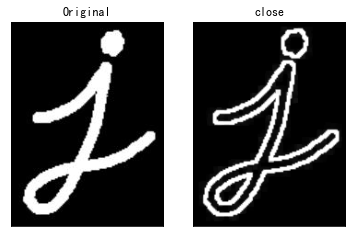

In [23]:
img = cv.imread('./opencvDATA/char1.jpg',0)
kernel = np.ones((5,5),np.uint8)
#Gradient of calculation
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
plt.subplot(121),plt.imshow(img,plt.cm.gray),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gradient,plt.cm.gray),plt.title('close')
plt.xticks([]), plt.yticks([])
plt.show()

## 5-Edge detection


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Find the intensity gradient of the image, and then filter the smooth image in both horizontal and vertical directions using the Sobel kernel to obtain the first derivative in the horizontal direction (Gx) and vertical direction (Gy). From these two images, we can find the edge gradient and orientation of each pixel, as shown below:<br><br>
$$
Edge\_Gradient \; (G) = \sqrt{G_x^2 + G_y^2} \\ Angle \; (\theta) = \tan^{-1} 
\bigg(\frac{G_y}{G_x}\bigg)
$$
<font>

### 5.1 Non-maximum suppression

<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After the gradient size and direction are obtained, the image is fully scanned to remove all unwanted pixels that may not form an edge. To do this, at each pixel, check whether the pixel is at its local maximum near the direction of the gradient. Check out the images below:
<font>

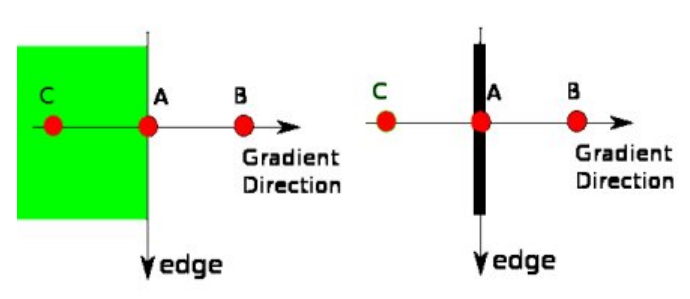

<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Point A is on the edge (vertical direction). The gradient is perpendicular to the edge. B and C are in the direction of the gradient. Therefore, point A is checked with point B and point C to see if a local maximum is formed. If so, consider using it for the next stage, otherwise suppress it (set to zero). In short, you get a binary image with a "thin edge."
<font>

### Hysteresis threshold
<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This phase determines which edges are all true edges and which are not. To do this, we need two thresholds minVal and maxVal. Any edges with an intensity gradient greater than maxVal must be edges, and those with an intensity gradient less than minVal must be non-edges, so they are discarded. Objects between these two thresholds are classified as marginal or non-marginal based on their connectivity. If you connect them to "edge" pixels, they are treated as part of the edge. Otherwise, they will also be discarded. See the picture below:
<font>

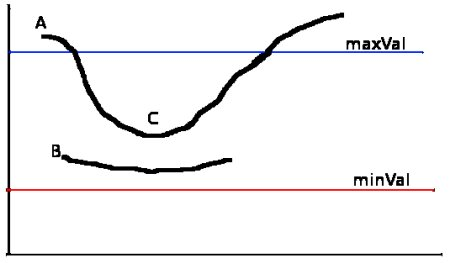

<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Edge A is above maxVal and is therefore considered a "defined edge". Although edge C is below maxVal, it is connected to edge A and is therefore also treated as a valid edge, and we get the complete curve. But edge B, despite being above the minVal and in the same region as edge C, is not connected to any "secure edge" and is therefore discarded. Therefore, it is very important that we select minVal and maxVal accordingly to get the correct result.
<br>

### 5.2 Canny Edge detection in OpenCV
<font color=gray size=3>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;OpenCV puts all of the above in a single function<strong>cv.Canny()</strong>. We'll see how to use it.
The first parameter is our input image. The second argument is our minVal and maxVal. The third parameter is perture_size. It is the size of the Sobel kernel used to find image gradients. The default value is 3. The last parameter is L2gradient, which specifies the equation used to find the magnitude of the gradient. If True, use the more precise formula mentioned above, otherwise use the following function <br><br>$$Edge\_Gradient \; (G) = |G_x| + |G_y|$$ By default, it is False.
</font>

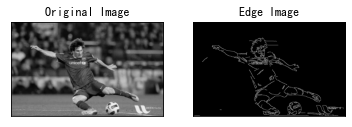

In [24]:
img = cv.imread('./opencvDATA/messi.jpg',0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()